# Data Analysis and Prediction of Sale Price of Bulldozers

In this notebook, our main goal is to predict the sale price of bulldozers.

## 1. Problem definition

> How well can we predict the future sale price of a bulldozer, given its characteristics and previous examples of how similar bulldozers have been sold for?



## 2. Data

The data is downloaded from Kaggle.

There are 3 main datasets:

* Train.csv is the training data set, which contains data through the end of 2011.
* Valid.csv is the validation set, which contains data from January 1,2012 - April 30,2012.
* Test.csv is the test set

## 3. Evaluation

The evaluation metric for this project is RMSLE (root mean squared log error) between the actual and predicted auction prices. 

## 4. Features

Some Key Features:
    
   * SalesID: the unique identifier of the sale
   * MachineID : the unique identifier of a machine. A machine can be sold multiple times
   * saleprice: what the machine sold for at auction (only in train.csv)
   * saledate : the date of sale

In [267]:
#Importing the tools we need

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.metrics import mean_squared_error,mean_squared_log_error
import plotly.graph_objects as go
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [112]:
# Importing training and validation data sets
df = pd.read_csv("Train.csv",low_memory=True)
pd.set_option("display.max_columns",None)

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 401125 entries, 0 to 401124
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   saledate                  401125 non-null  object 
 10  fiModelDesc               401125 non-null  object 
 11  fiBaseModel               401125 non-null  object 
 12  fiSecondaryDesc           263934 non-null  object 
 13  fiModelSeries             56908 non-null   o

In [114]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension     

In [115]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
df.saledate[:1000]

0      11/16/2006 0:00
1       3/26/2004 0:00
2       2/26/2004 0:00
3       5/19/2011 0:00
4       7/23/2009 0:00
            ...       
995     7/16/2009 0:00
996     6/14/2007 0:00
997     9/22/2005 0:00
998     7/28/2005 0:00
999     6/16/2011 0:00
Name: saledate, Length: 1000, dtype: object

In [117]:
df.saledate.dtype

dtype('O')

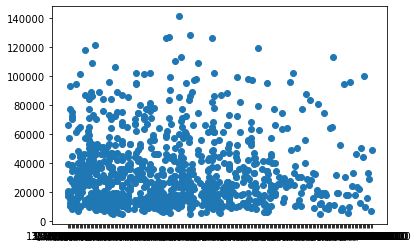

In [118]:
# Comparing the sales with the saledate
fig,ax = plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000]);

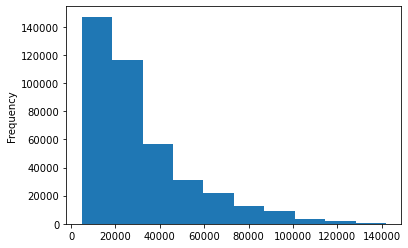

In [119]:
df.SalePrice.plot.hist();

### Parsing dates



Using Parse_dates pandas function

In [120]:
# parsing the dates
df = pd.read_csv("Train.csv", 
                  low_memory= False,
                  parse_dates=["saledate"])

In [121]:
df.saledate.dtype

dtype('<M8[ns]')

In [122]:
df.saledate[:1000]

0     2006-11-16
1     2004-03-26
2     2004-02-26
3     2011-05-19
4     2009-07-23
         ...    
995   2009-07-16
996   2007-06-14
997   2005-09-22
998   2005-07-28
999   2011-06-16
Name: saledate, Length: 1000, dtype: datetime64[ns]

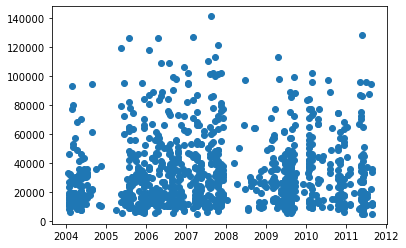

In [123]:
# Plotting sales  after parsing the dates
fig,ax= plt.subplots()
ax.scatter(df.saledate[:1000],df.SalePrice[:1000]);

<AxesSubplot:xlabel='SalePrice', ylabel='state'>

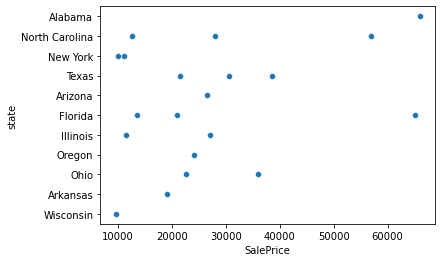

In [124]:
sns.scatterplot(df.SalePrice[:1000],df.state[:20])

In [125]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000,999089,3157,121,3.0,2004,68.0,Low,2006-11-16,521D,521,D,NaN,NaN,NaN,Wheel Loader - 110.0 to 120.0 Horsepower,Alabama,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000,117657,77,121,3.0,1996,4640.0,Low,2004-03-26,950FII,950,F,II,NaN,Medium,Wheel Loader - 150.0 to 175.0 Horsepower,North Carolina,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,23.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000,434808,7009,121,3.0,2001,2838.0,High,2004-02-26,226,226,NaN,NaN,NaN,NaN,Skid Steer Loader - 1351.0 to 1601.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,OROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500,1026470,332,121,3.0,2001,3486.0,High,2011-05-19,PC120-6E,PC120,NaN,-6E,NaN,Small,"Hydraulic Excavator, Track - 12.0 to 14.0 Metr...",Texas,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000,1057373,17311,121,3.0,2007,722.0,Medium,2009-07-23,S175,S175,NaN,NaN,NaN,NaN,Skid Steer Loader - 1601.0 to 1751.0 Lb Operat...,New York,SSL,Skid Steer Loaders,NaN,EROPS,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,None or Unspecified,Standard,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [126]:
df.saledate.head(20)

0    2006-11-16
1    2004-03-26
2    2004-02-26
3    2011-05-19
4    2009-07-23
5    2008-12-18
6    2004-08-26
7    2005-11-17
8    2009-08-27
9    2007-08-09
10   2008-08-21
11   2006-08-24
12   2005-10-20
13   2006-01-26
14   2006-01-03
15   2006-11-16
16   2007-06-14
17   2010-01-28
18   2006-03-09
19   2005-11-17
Name: saledate, dtype: datetime64[ns]

### Sort DataFrame by saledate

When working with time series data, it's a good idea to sort it by date.

In [127]:
# Sorting dataframe in date order
df.sort_values(by=["saledate"], inplace=True, ascending=True)
df.saledate.head(20)

205615   1989-01-17
92803    1989-01-31
98346    1989-01-31
169297   1989-01-31
274835   1989-01-31
75378    1989-01-31
81383    1989-01-31
134080   1989-01-31
55455    1989-01-31
55454    1989-01-31
114830   1989-01-31
54653    1989-01-31
238373   1989-01-31
98567    1989-01-31
113454   1989-01-31
92780    1989-01-31
113390   1989-01-31
127000   1989-01-31
92833    1989-01-31
32138    1989-01-31
Name: saledate, dtype: datetime64[ns]

### Making a copy of the original DataFrame

We make a copy of the original dataframe so when we manipulate the copy, we have still got our original data.

In [128]:
# making copy in a temporary df
df_temp = df.copy()

In [129]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,416,416,NaN,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,BL,Backhoe Loaders,Two Wheel Drive,EROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,12G,12,G,NaN,NaN,NaN,Motorgrader - 130.0 to 145.0 Horsepower,Florida,MG,Motor Graders,No,OROPS,NaN,NaN,NaN,NaN,None or Unspecified,NaN,None or Unspecified,12',None or Unspecified,No,Base + 1 Function,None or Unspecified,None or Unspecified,Yes,Sideshift & Tip,"14""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,644,644,NaN,NaN,NaN,Medium,Wheel Loader - 175.0 to 200.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional


 ### Add datetime parameters to `saledate` column

In [130]:
df_temp[:1].saledate.dt.year

205615    1989
Name: saledate, dtype: int64

In [131]:
df_temp[:1].saledate.dt.day

205615    17
Name: saledate, dtype: int64

In [132]:
df_temp[:1].saledate

205615   1989-01-17
Name: saledate, dtype: datetime64[ns]

In [133]:
# Creating new features (Feature engg.)

df_temp["saleYear"] = df_temp.saledate.dt.year
df_temp["saleMonth"] = df_temp.saledate.dt.month
df_temp["saleDay"] = df_temp.saledate.dt.day
df_temp["saleDayOfWeek"] = df_temp.saledate.dt.dayofweek
df_temp["saleDayOfYear"] = df_temp.saledate.dt.dayofyear

In [134]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,1989-01-31,416,416,NaN,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,BL,Backhoe Loaders,Two Wheel Drive,EROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
98346,1415646,35000,1262088,3357,132,99.0,1975,NaN,NaN,1989-01-31,12G,12,G,NaN,NaN,NaN,Motorgrader - 130.0 to 145.0 Horsepower,Florida,MG,Motor Graders,No,OROPS,NaN,NaN,NaN,NaN,None or Unspecified,NaN,None or Unspecified,12',None or Unspecified,No,Base + 1 Function,None or Unspecified,None or Unspecified,Yes,Sideshift & Tip,"14""",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31
169297,1596358,19000,1433229,8247,132,99.0,1978,NaN,NaN,1989-01-31,644,644,NaN,NaN,NaN,Medium,Wheel Loader - 175.0 to 200.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31
274835,1821514,14000,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,A66,A66,NaN,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,OROPS,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,None or Unspecified,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,1989,1,31,1,31


In [135]:
# now we can remove our saledate column
df_temp.drop(["saledate"], axis = 1 , inplace=True)

## Exploratory Data Analysis

In [139]:
total_sales = df_temp.groupby("saleMonth").sum()
months = np.arange(1,13)
total_sales.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleDay,saleDayOfWeek,saleDayOfYear
saleMonth,,,,,,,,,,,,
1,17415732015,326845992,11405061197,73489029,1316853,83613.0,18828883,10133641.0,19962351,248138,40197,248138
2,93511489381,1729714506,62643277266,367093182,7029154,199496.0,99438516,29995542.0,105125778,669708,108046,2295720
3,99552727424,1712606850,66143069521,368228342,7340426,305544.0,103790458,84641062.0,109381227,1017702,135503,4249126
4,49779513457,877834157,34493748172,189264587,3835175,301598.0,54490782,120509653.0,57590396,456857,80352,3052245
5,58435714139,1008338564,38708266457,217715408,4294581,216833.0,60112684,50447759.0,64106836,538414,84917,4383957


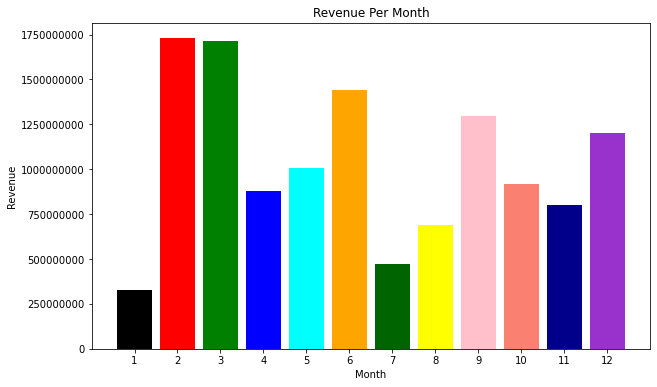

In [155]:
# which month has most sales
plt.figure(figsize=(10,6))
plt.bar(months,total_sales["SalePrice"],color=['black', 'red', 'green', 'blue', 'cyan',"orange","darkgreen","yellow","pink","salmon","darkblue","darkorchid"])
plt.ticklabel_format(style="plain")
plt.xticks(month);
plt.title("Revenue Per Month")
plt.xlabel("Month")
plt.ylabel("Revenue");

In [169]:
year_sales = df_temp.groupby("saleYear").sum()
year = [1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011]
year_sales.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
saleYear,,,,,,,,,,,,
1989,7095543908,136744650,6123695366,33937535,634392,45817.0,9508727,183518.0,29515,69951,10738,817594
1990,6698898892,139848100,5723336921,30891679,597828,40748.0,8968592,242926.0,27575,71027,9688,768068
1991,7510573153,159752859,6381468978,34127766,674388,22584.0,10123297,350348.0,29721,81593,11509,825840
1992,8146469488,157651950,6979298355,38166971,728508,26230.0,10932040,375937.0,41229,86566,14426,1173434
1993,9325729119,188599870,7879987781,43277385,831996,54501.0,12489657,391724.0,40185,96248,17252,1121227


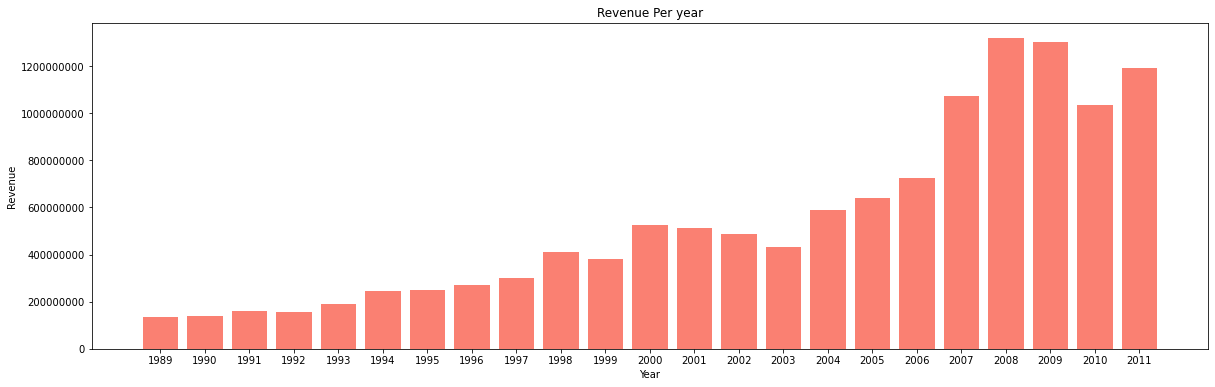

In [184]:
# Which year has most Sales?
plt.figure(figsize=(20,6))
plt.bar(year,year_sales["SalePrice"],color="salmon")
plt.ticklabel_format(style="plain")
plt.xticks(year);
plt.title("Revenue Per year")
plt.xlabel("Year")
plt.ylabel("Revenue");

In [193]:
week_sales = df_temp.groupby("saleDayOfWeek").sum()
weekday = [0,1,2,3,4,5,6]
week_sales

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayOfYear
saleDayOfWeek,,,,,,,,,,,,
0,44996408376,705605550,27779373341,153909884,2990147,64551.0,41466899,16217262.0,43711057,94809,290320,2512149
1,154759554601,2423743775,95524610026,517737064,10365321,321546.0,146040044,58160695.0,152253114,494475,1263203,13947868
2,185594565171,2849328528,110434955974,619702975,12185111,525746.0,170566034,76821997.0,179580863,604352,1436638,17035151
3,213711766572,3876559171,140208652564,840509316,16107932,799634.0,229978625,213981440.0,243416952,777323,2003329,21865859
4,84341172348,1304093212,52945107744,298816928,5806079,307777.0,82015811,91669584.0,86488716,288210,693001,8122618
5,76616835303,1153013030,55063453286,292432210,5839201,467187.0,81596569,35394356.0,87610774,297264,713173,8396849
6,10024382817,162529050,6574994586,40523731,724032,11338.0,10135330,1429662.0,10831423,13589,62621,313013


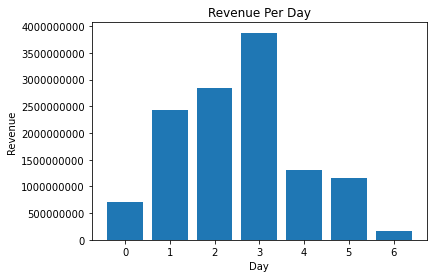

In [195]:
# Week of Day
plt.figure()
plt.bar(weekday,week_sales["SalePrice"])
plt.ticklabel_format(style="plain")
plt.xticks(weekday)
plt.title("Revenue Per Day");
plt.xlabel("Day")
plt.ylabel("Revenue");

### TOP 10 State with most Sales

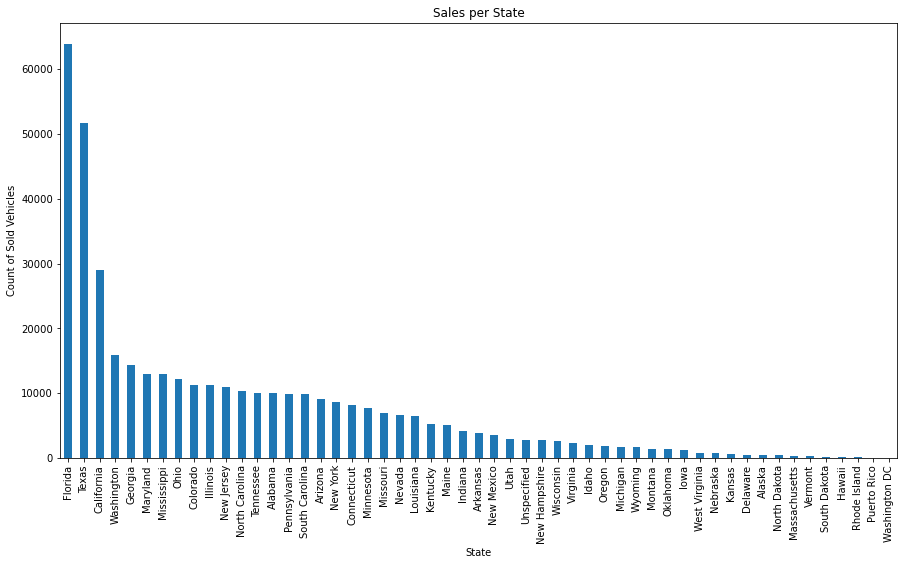

In [213]:
df_temp.state.value_counts()[:60].sort_values(ascending=False).plot(kind="bar",figsize=(15,8))
plt.title("Sales per State")
plt.xlabel("State")
plt.ylabel("Count of Sold Vehicles");

In [214]:
df_temp["fiProductClassDesc"]

205615    Track Type Tractor, Dozer - 105.0 to 130.0 Hor...
92803     Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...
98346               Motorgrader - 130.0 to 145.0 Horsepower
169297             Wheel Loader - 175.0 to 200.0 Horsepower
274835             Wheel Loader - 120.0 to 135.0 Horsepower
                                ...                        
393123    Track Type Tractor, Dozer - 75.0 to 85.0 Horse...
397987             Wheel Loader - 135.0 to 150.0 Horsepower
392664    Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...
400458               Wheel Loader - 40.0 to 60.0 Horsepower
400217    Skid Steer Loader - 1751.0 to 2201.0 Lb Operat...
Name: fiProductClassDesc, Length: 401125, dtype: object

In [250]:
product_sales = df_temp.groupby("product_name").sum()
product = df_temp["product_name"].unique()
product_sales

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
product_name,,,,,,,,,,,,,
Backhoe Loader,146199765534,1659563253,99748138775,431521585,10673055,531943.0,153684124,70222999.0,159138307,519468,1280111,211120,14615946
"Hydraulic Excavator, Track",202166802361,3608234425,122718843773,803602084,13653087,532956.0,189403014,147247871.0,202823442,645280,1644195,274297,18136327
Motorgrader,47186192796,1204395128,30013310140,190271549,3421329,180537.0,47797188,24312956.0,51063468,159204,405900,60552,4456983
Skid Steer Loader,89228290963,458774854,55892184622,453477703,5878141,267814.0,82951505,42973877.0,87219556,285002,704734,117084,8024510
"Track Type Tractor, Dozer",150196816040,2911475352,93445203583,439643077,10827452,545872.0,153290793,94545374.0,161295360,515238,1295425,202597,14469826
Wheel Loader,135066817494,2632429304,86713466628,445116110,9564759,438657.0,134672688,114371919.0,142352766,445830,1131920,177666,12489915


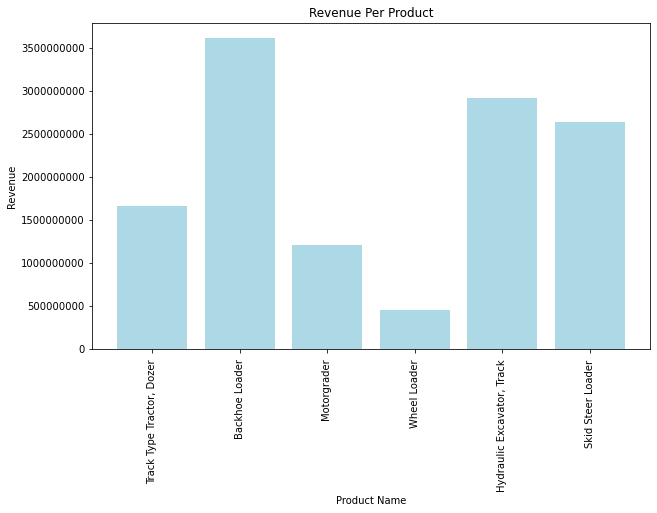

In [251]:
plt.figure(figsize=(10,6))
plt.ticklabel_format(style="plain")
plt.bar(product,product_sales["SalePrice"],color="lightblue")
plt.xticks(product,rotation="vertical");
plt.title("Revenue Per Product")
plt.xlabel("Product Name")
plt.ylabel("Revenue");

In [283]:
sales_year = df_temp.groupby(["product_name","saleYear"]).sum().reset_index()
sales_year.head()

,product_name,saleYear,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
0,Backhoe Loader,1989,1427982115,15853950,1313644241,8267448,133452,8276.0,2002909,64726.0,6217,15450,2371,173016
1,Backhoe Loader,1990,1205098708,13360050,1104345744,6738833,112068,7824.0,1683942,66852.0,5247,14333,2014,147392
2,Backhoe Loader,1991,1421753956,16310150,1291829129,7939445,133848,4195.0,2011676,68860.0,5645,17293,2374,157256
3,Backhoe Loader,1992,1551918280,17162900,1420350409,8712739,145728,5747.0,2190476,106612.0,8619,17133,3051,245876
4,Backhoe Loader,1993,1795714312,21648670,1633405928,9947822,168300,13319.0,2530570,88771.0,8197,20755,3998,230151


###  Plot for Sales Per Year for Each Product

In [282]:
year_plot = go.Figure()
for prod in sales_year["product_name"].unique():
    x = sales_year[sales_year["product_name"] == prod]["saleYear"].values.tolist()
    y = sales_year[sales_year["product_name"] == prod]["SalePrice"].values.tolist()
    year_plot.add_trace(go.Scatter(x=x,y=y,name=prod))
    
year_plot.update_layout(title='Sales per Product', xaxis_title='Year', yaxis_title='Sales(M)')
year_plot.show()

### Sales Month of Year

In [286]:
month_sales = df_temp.groupby(["product_name","saleMonth"]).sum().reset_index()

month_plot = go.Figure()

for prod in month_sales["product_name"].unique():
    x = month_sales[month_sales["product_name"]==prod]["saleMonth"].values.tolist()
    y = month_sales[month_sales["product_name"]==prod]["SalePrice"].values.tolist()
    month_plot.add_trace(go.Scatter(x=x,y=y,name=prod))
    
month_plot.update_layout(title="Sales Per Product",xaxis_title = "Month of Year",yaxis_title="Sales(M)")
month_plot.show()

In [290]:
average_sales = (df_temp.groupby("saleYear").mean().squeeze())

x = average_sales.reset_index()["saleYear"].astype("str").values.tolist()
y = average_sales["SalePrice"].values.tolist()
trndfg = go.Figure()
trndfg.add_trace(go.Scatter(x=x,y=y,name="Average Sales"))
trndfg.update_layout(title=" Average Revenue",xaxis_title="Year",yaxis_title="Revenue")
trndfg.show()

In [218]:
df_temp.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,product_name
205615,1646770,9500,1126363,8434,132,18.0,1974,NaN,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17,"Track Type Tractor, Dozer"
92803,1404019,24000,1169900,7110,132,99.0,1986,NaN,NaN,416,416,NaN,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,BL,Backhoe Loaders,Two Wheel Drive,EROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31,Backhoe Loader


In [291]:
df_temp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    258360
UsageBand                   331486
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             137191
fiModelSeries               344217
fiModelDescriptor           329206
ProductSize                 210775
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                296764
Enclosure                      325
Forks                       209048
Pad_Type                    321991
Ride_Control                252519
Stick                       321991
Transmission                217895
Turbocharged                321991
Blade_Extension             375906
Blade_Width         

In [292]:
df_temp["UsageBand"].dtype

dtype('O')

### Convert string to categories

Using pandas api to check the datatypes and convert them into numerical form

In [293]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   401125 non-null  int64  
 1   SalePrice                 401125 non-null  int64  
 2   MachineID                 401125 non-null  int64  
 3   ModelID                   401125 non-null  int64  
 4   datasource                401125 non-null  int64  
 5   auctioneerID              380989 non-null  float64
 6   YearMade                  401125 non-null  int64  
 7   MachineHoursCurrentMeter  142765 non-null  float64
 8   UsageBand                 69639 non-null   object 
 9   fiModelDesc               401125 non-null  object 
 10  fiBaseModel               401125 non-null  object 
 11  fiSecondaryDesc           263934 non-null  object 
 12  fiModelSeries             56908 non-null   object 
 13  fiModelDescriptor         71919 non-nul

In [294]:
pd.api.types.is_string_dtype(df_temp["UsageBand"])

True

In [295]:
df_object_type = df_temp.select_dtypes(include="object")
print(df_object_type.columns)
len(df_object_type.columns)


Index(['UsageBand', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc',
       'fiModelSeries', 'fiModelDescriptor', 'ProductSize',
       'fiProductClassDesc', 'state', 'ProductGroup', 'ProductGroupDesc',
       'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 'Ride_Control',
       'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension',
       'Blade_Width', 'Enclosure_Type', 'Engine_Horsepower', 'Hydraulics',
       'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size',
       'Coupler', 'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow',
       'Track_Type', 'Undercarriage_Pad_Width', 'Stick_Length', 'Thumb',
       'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type',
       'Travel_Controls', 'Differential_Type', 'Steering_Controls',
       'product_name'],
      dtype='object')


45

In [296]:
#changing the object data into category data using pandas api
for columns,content in df_temp.items():
    if pd.api.types.is_string_dtype(content):
        df_temp[columns] = content.astype("category").cat.as_ordered()

In [297]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Data columns (total 58 columns):
 #   Column                    Non-Null Count   Dtype   
---  ------                    --------------   -----   
 0   SalesID                   401125 non-null  int64   
 1   SalePrice                 401125 non-null  int64   
 2   MachineID                 401125 non-null  int64   
 3   ModelID                   401125 non-null  int64   
 4   datasource                401125 non-null  int64   
 5   auctioneerID              380989 non-null  float64 
 6   YearMade                  401125 non-null  int64   
 7   MachineHoursCurrentMeter  142765 non-null  float64 
 8   UsageBand                 69639 non-null   category
 9   fiModelDesc               401125 non-null  category
 10  fiBaseModel               401125 non-null  category
 11  fiSecondaryDesc           263934 non-null  category
 12  fiModelSeries             56908 non-null   category
 13  fiModelDescriptor       

In [298]:
df_temp.state.value_counts()

Florida           63944
Texas             51682
California        29019
Washington        15955
Georgia           14309
Maryland          12965
Mississippi       12961
Ohio              12190
Colorado          11254
Illinois          11209
New Jersey        10882
North Carolina    10404
Tennessee         10027
Alabama            9997
Pennsylvania       9941
South Carolina     9794
Arizona            9173
New York           8604
Connecticut        8128
Minnesota          7734
Missouri           6961
Nevada             6693
Louisiana          6450
Kentucky           5278
Maine              5095
Indiana            4086
Arkansas           3869
New Mexico         3529
Utah               2895
Unspecified        2801
New Hampshire      2724
Wisconsin          2668
Virginia           2288
Idaho              2018
Oregon             1775
Michigan           1763
Wyoming            1662
Montana            1327
Oklahoma           1311
Iowa               1215
West Virginia       746
Nebraska        

In [299]:
df_temp.state.cat.codes                   #as we can see that the cotegorial values under the hood are used as numbers

205615    43
92803      8
98346      8
169297     8
274835     8
          ..
393123    31
397987    31
392664    31
400458    31
400217    31
Length: 401125, dtype: int8

In [300]:
df_temp.isnull().sum()/len(df_temp)

SalesID                     0.000000
SalePrice                   0.000000
MachineID                   0.000000
ModelID                     0.000000
datasource                  0.000000
auctioneerID                0.050199
YearMade                    0.000000
MachineHoursCurrentMeter    0.644089
UsageBand                   0.826391
fiModelDesc                 0.000000
fiBaseModel                 0.000000
fiSecondaryDesc             0.342016
fiModelSeries               0.858129
fiModelDescriptor           0.820707
ProductSize                 0.525460
fiProductClassDesc          0.000000
state                       0.000000
ProductGroup                0.000000
ProductGroupDesc            0.000000
Drive_System                0.739829
Enclosure                   0.000810
Forks                       0.521154
Pad_Type                    0.802720
Ride_Control                0.629527
Stick                       0.802720
Transmission                0.543210
Turbocharged                0.802720
B

## Filling the missing values

### Filling numerical missing values first

In [301]:
for columns,content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(columns)

SalesID
SalePrice
MachineID
ModelID
datasource
auctioneerID
YearMade
MachineHoursCurrentMeter
saleYear
saleMonth
saleDay
saleDayOfWeek
saleDayOfYear


In [302]:
# finding Null values for nueric data type
for col,value in df_temp.items():
    if pd.api.types.is_numeric_dtype(value):
        if pd.isnull(value).sum():
            print(col)

auctioneerID
MachineHoursCurrentMeter


In [304]:
# Filling Null values
for col,values in df_temp.items():
    if pd.api.types.is_numeric_dtype(values):
        if pd.isnull(values).sum()/len(df_temp):
            df_temp[col + "is_missing"] = pd.isnull(values)  #adding column to tell whether that column was missing
            df_temp[col] = values.fillna(values.median())

In [305]:
# checking if there is any numerical value again
for label, content in df_temp.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [306]:
df_temp.head(2)

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,product_name,auctioneerIDis_missing,MachineHoursCurrentMeteris_missing
205615,1646770,9500,1126363,8434,132,18.0,1974,0.0,NaN,TD20,TD20,NaN,NaN,NaN,Medium,"Track Type Tractor, Dozer - 105.0 to 130.0 Hor...",Texas,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Direct Drive,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN,1989,1,17,1,17,"Track Type Tractor, Dozer",False,True
92803,1404019,24000,1169900,7110,132,99.0,1986,0.0,NaN,416,416,NaN,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Florida,BL,Backhoe Loaders,Two Wheel Drive,EROPS,None or Unspecified,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,1,31,1,31,Backhoe Loader,False,True


As we can there is nothing in o/p it means we no missing values

In [307]:
# Checking to see how many values were missing before
df_temp.auctioneerIDis_missing.value_counts()

False    380989
True      20136
Name: auctioneerIDis_missing, dtype: int64

True : means we have filled that much values which were missing before

In [308]:
### Filling and turning categorical values into numbers

for columns,values in df_temp.items():
    if not pd.api.types.is_numeric_dtype(values):
        print(columns)

UsageBand
fiModelDesc
fiBaseModel
fiSecondaryDesc
fiModelSeries
fiModelDescriptor
ProductSize
fiProductClassDesc
state
ProductGroup
ProductGroupDesc
Drive_System
Enclosure
Forks
Pad_Type
Ride_Control
Stick
Transmission
Turbocharged
Blade_Extension
Blade_Width
Enclosure_Type
Engine_Horsepower
Hydraulics
Pushblock
Ripper
Scarifier
Tip_Control
Tire_Size
Coupler
Coupler_System
Grouser_Tracks
Hydraulics_Flow
Track_Type
Undercarriage_Pad_Width
Stick_Length
Thumb
Pattern_Changer
Grouser_Type
Backhoe_Mounting
Blade_Type
Travel_Controls
Differential_Type
Steering_Controls
product_name


In [309]:
pd.Categorical(df_temp["state"]).codes

array([43,  8,  8, ..., 31, 31, 31], dtype=int8)

In [310]:
# Filling the categorical values with numerical values
for columns,values in df_temp.items():
    if not pd.api.types.is_numeric_dtype(values):
            df_temp[columns+"is_missing"] = pd.isnull(values)
            df_temp[columns] = pd.Categorical(values).codes+1 #we are adding 1 here because the missing are given -1 value 
                                                               #toavoid the negative values we add +1 here """

In [311]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401125 entries, 205615 to 400217
Columns: 105 entries, SalesID to product_nameis_missing
dtypes: bool(47), float64(2), int16(4), int64(11), int8(41)
memory usage: 87.6 MB


In [312]:
df_temp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,product_name,auctioneerIDis_missing,MachineHoursCurrentMeteris_missing,UsageBandis_missing,fiModelDescis_missing,fiBaseModelis_missing,fiSecondaryDescis_missing,fiModelSeriesis_missing,fiModelDescriptoris_missing,ProductSizeis_missing,fiProductClassDescis_missing,stateis_missing,ProductGroupis_missing,ProductGroupDescis_missing,Drive_Systemis_missing,Enclosureis_missing,Forksis_missing,Pad_Typeis_missing,Ride_Controlis_missing,Stickis_missing,Transmissionis_missing,Turbochargedis_missing,Blade_Extensionis_missing,Blade_Widthis_missing,Enclosure_Typeis_missing,Engine_Horsepoweris_missing,Hydraulicsis_missing,Pushblockis_missing,Ripperis_missing,Scarifieris_missing,Tip_Controlis_missing,Tire_Sizeis_missing,Coupleris_missing,Coupler_Systemis_missing,Grouser_Tracksis_missing,Hydraulics_Flowis_missing,Track_Typeis_missing,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,product_nameis_missing
205615,1646770,9500,1126363,8434,132,18.0,1974,0.0,0,4537,1735,0,0,0,4,47,44,5,5,0,6,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,6,0,0,1989,1,17,1,17,5,False,True,True,False,False,True,True,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False
92803,1404019,24000,1169900,7110,132,99.0,1986,0.0,0,735,243,0,0,0,0,2,9,1,1,4,1,1,2,1,2,8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1989,1,31,1,31,1,False,True,True,False,False,True,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
98346,1415646,35000,1262088,3357,132,99.0,1975,0.0,0,82,19,57,0,0,0,31,9,2,2,3,6,0,0,0,0,5,0,1,1,3,1,5,1,2,2,2,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1989,1,31,1,31,3,False,True,True,False,False,False,True,True,True,False,False,False,False,False,False,True,True,True,True,False,True,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
169297,1596358,19000,1433229,8247,132,99.0,1978,0.0,0,1158,349,0,0,0,4,63,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,6,False,True,True,False,False,True,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False
274835,1821514,14000,1194089,10150,132,99.0,1980,0.0,0,1800,557,0,0,0,0,60,9,6,6,0,6,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,17,3,0,0,0,0,0,0,0,0,0,0,0,0,4,2,1989,1,31,1,31,6,False,True,True,False,False,True,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False


In [313]:
df_temp.isna().sum()

SalesID                        0
SalePrice                      0
MachineID                      0
ModelID                        0
datasource                     0
                              ..
Blade_Typeis_missing           0
Travel_Controlsis_missing      0
Differential_Typeis_missing    0
Steering_Controlsis_missing    0
product_nameis_missing         0
Length: 105, dtype: int64

Now that all of our data is numerica as well as our dataframe has no missing values, we should be able to build a machine learning model.

In [314]:
df_temp.describe()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,product_name
count,4.011250e+05,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,4.011250e+05,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.00000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000,401125.000000
mean,1.919713e+06,31099.712848,1.217903e+06,6889.702980,134.665810,6.327332,1899.156901,1.230726e+03,0.401942,1673.709485,559.165442,36.685036,9.192686,12.233433,1.818219,32.262222,23.508318,3.725524,3.725524,0.809299,3.605195,0.513192,0.422315,0.566736,0.319010,3.372502,0.207060,0.064184,0.235228,0.178436,0.066067,4.253801,0.07722,0.552434,0.094088,0.090179,3.059847,1.511791,0.115889,0.115199,0.321483,0.458792,4.311895,6.535564,0.685153,0.516719,0.319479,0.196178,1.278128,1.132009,0.683189,0.344987,2004.095728,6.407035,16.110402,2.600975,179.977581,3.393067
std,9.090215e+05,23036.898502,4.409920e+05,6221.777842,8.962237,16.575066,291.797469,1.654290e+04,0.930860,1263.331163,469.310266,38.228243,27.006859,29.041950,2.107830,22.596618,15.732898,1.725772,1.725772,1.436850,2.220353,0.564375,0.873469,0.822794,0.678752,3.764052,0.428657,0.250385,1.025710,0.697879,0.260948,4.809368,0.31616,0.988317,0.384207,0.382552,5.950781,1.450320,0.342865,0.340769,0.926401,0.819459,7.741894,11.923308,1.226899,0.912594,0.659002,0.397231,2.649002,2.307099,1.501999,0.755775,5.754190,3.424575,8.427322,1.405763,103.559930,1.842565
min,1.139246e+06,4750.000000,0.000000e+00,28.000000,121.000000,0.000000,1000.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1989.000000,1.000000,1.000000,0.000000,2.000000,1.000000
25%,1.418371e+06,14500.000000,1.088697e+06,3259.000000,132.000000,1.000000,1985.000000,0.000000e+00,0.000000,631.000000,206.000000,0.000000,0.000000,0.000000,0.000000,11.000000,9.000000,2.000000,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2000.000000,3.000000,9.000000,2.000000,84.000000,2.000000
50%,1.639422e+06,24000.000000,1.279490e+06,4604.000000,132.000000,2.000000,1995.000000,0.000000e+00,0.000000,1395.000000,406.000000,29.000000,0.000000,0.000000,0.000000,35.000000,22.000000,4.000000,4.000000,0.000000,3.000

<AxesSubplot:xlabel='SalePrice', ylabel='Count'>

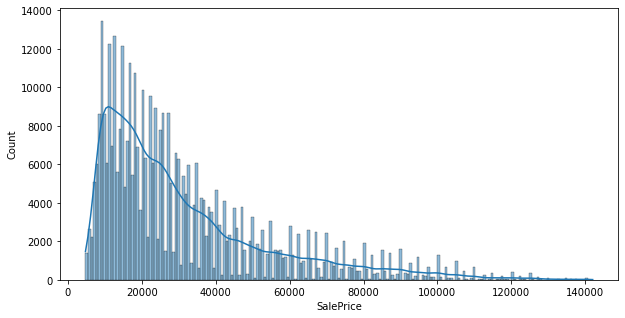

In [315]:
# Historgam for SalePrice
plt.figure(figsize=(10,5))
sns.histplot(df_temp["SalePrice"],kde=True)

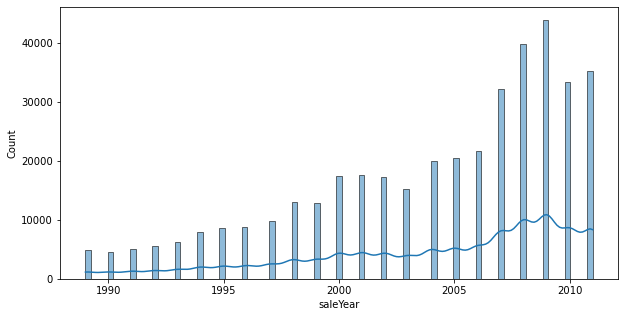

In [316]:
#Histogram for Sale year
plt.figure(figsize=(10,5))
sns.histplot(df_temp["saleYear"],kde=True);

<AxesSubplot:>

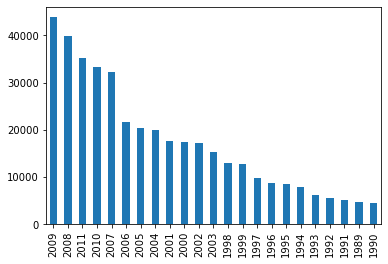

In [317]:
df_temp["saleYear"].value_counts().plot(kind="bar")

In [318]:
corr_mat = df_temp[["SalesID","SalePrice","MachineID","ModelID","datasource","auctioneerID","YearMade","MachineHoursCurrentMeter","saleYear","saleMonth","saleDay","saleDayOfWeek","saleDayOfYear"]].corr()
corr_mat

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear
SalesID,1.000000,0.010725,0.286812,0.150199,0.788917,-0.027515,0.001701,0.034438,0.437553,0.121679,0.017943,-0.107666,0.123481
SalePrice,0.010725,1.000000,-0.224854,-0.042125,0.015122,-0.044900,0.156453,0.016638,0.038484,-0.028498,0.000013,-0.056823,-0.028556
MachineID,0.286812,-0.224854,1.000000,0.160591,0.327118,-0.003434,-0.060384,0.003093,0.051761,0.035245,0.000008,-0.028508,0.035290
ModelID,0.150199,-0.042125,0.160591,1.000000,0.091757,-0.021774,-0.049762,0.008446,0.139346,0.007542,0.006178,-0.002535,0.008089
datasource,0.788917,0.015122,0.327118,0.091757,1.000000,-0.020805,0.067088,0.037230,0.319850,0.063777,-0.000403,-0.133594,0.063588
auctioneerID,-0.027515,-0.044900,-0.003434,-0.021774,-0.020805,1.000000,-0.015699,0.010025,-0.075247,0.015377,-0.018848,0.099104,0.013518
YearMade,0.001701,0.156453,-0.060384,-0.049762,0.067088,-0.015699,1.000000,-0.011664,-0.044084,0.017811,-0.010348,-0.045306,0.017178
MachineHoursCurrentMeter,0.034438,0.016638,0.003093,0.008446,0.037230,0.010025,-0.011664,1.000000,0.064634,-0.013186,0.000358,0.013072,-0.013502
saleYear,0.437553,0.038484,0.051761,0.139346,0.319850,-0.075247,-0.044084,0.064634,1.000000,-0.014792,0.032411,-0.074636,-0.012390
saleMonth,0.121679,-0.028498,0.035245,0.007542,0.063777,0.015377,0.017811,-0.013186,-0.014792,1.000000,-0.124482,0.036912,0.996782


## Correlation Matrix for Numerical Data

<AxesSubplot:>

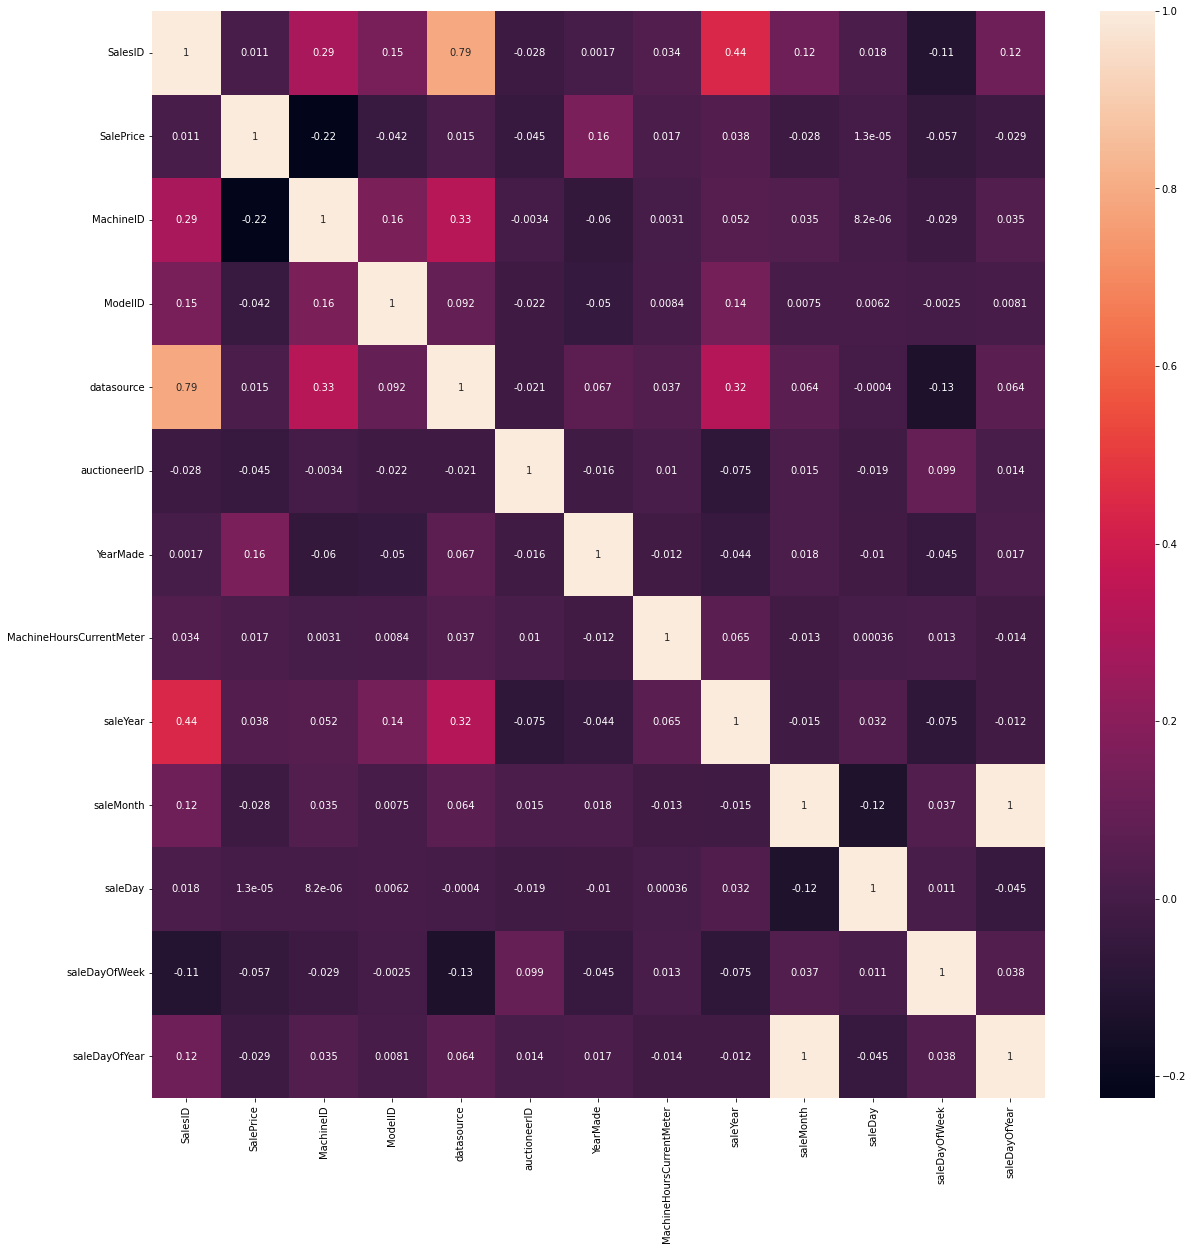

In [319]:
plt.figure(figsize=(20,20))
sns.heatmap(corr_mat,annot=True)

## 5. Modelling


In [320]:
from sklearn.ensemble import RandomForestRegressor

X = df_temp.drop("SalePrice",axis=1)
y = df_temp["SalePrice"]

In [321]:
X.shape, y.shape

((401125, 104), (401125,))

In [322]:
model = RandomForestRegressor(n_jobs=-1,
                              random_state=42)

# Fitting the model
model.fit(X, y)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [323]:
# Scoring the model
model.score(X, y)

0.9875255942454486

The above metric is not reliable as we have scored it on the same data itself we need to score it on Test data

### Splitting the data into train/validation sets

### Train Data Set

## Training Our Model

In [324]:
df_temp.saleYear

205615    1989
92803     1989
98346     1989
169297    1989
274835    1989
          ... 
393123    2011
397987    2011
392664    2011
400458    2011
400217    2011
Name: saleYear, Length: 401125, dtype: int64

#### Train Test

In [325]:
X_train = df_temp.drop("SalePrice",axis=1)
y_train = df_temp["SalePrice"]
X_train.shape,y_train.shape

((401125, 104), (401125,))

### Validation Set

In [326]:
df_valid = pd.read_csv("Validation_Set.csv",parse_dates=["saledate"])
df_valid.head(5)

,Unnamed: 0,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SalePrice,Usage
0,0,1222837,902859,1376,121,3,1000,0.0,NaN,2012-01-05,375L,375,NaN,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 66.0 to 90.0 Metr...",Kentucky,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,31000.0,PublicTest
1,1,1222839,1048320,36526,121,3,2006,4412.0,Medium,2012-01-05,TX300LC2,TX300,LC,2,NaN,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,Hydraulic,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,Yes,Double,NaN,NaN,NaN,NaN,NaN,54000.0,PublicTest
2,2,1222841,999308,4587,121,3,2000,10127.0,Medium,2012-01-05,270LC,270,NaN,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 24.0 to 28.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"12' 4""",None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,26500.0,PublicTest
3,3,1222843,1062425,1954,121,3,1000,4682.0,Low,2012-01-05,892DLC,892,D,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 28.0 to 33.0 Metr...",Connecticut,TEX,Track Excavators,NaN,EROPS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,None or Unspecified,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN,10000.0,PublicTest
4,4,1222845,1032841,4701,121,3,2002,8150.0,Medium,2012-01-04,544H,544,H,NaN,NaN,NaN,Wheel Loader - 120.0 to 135.0 Horsepower,Florida,WL,Wheel Loader,NaN,EROPS w AC,None or Unspecified,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,Manual,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional,35000.0,PublicTest


In [327]:
df_valid["MachineHoursCurrentMeter"].dtype

dtype('float64')

In [328]:
pd.api.types.is_numeric_dtype(df_valid["MachineHoursCurrentMeter"])

True

In [329]:
df_valid.sort_values(by="saledate",inplace=True)

In [330]:
df_valid["saledate"]

4550    2012-01-01
4951    2012-01-04
7893    2012-01-04
7901    2012-01-04
4       2012-01-04
           ...    
11351   2012-04-28
8771    2012-04-28
8776    2012-04-28
4652    2012-04-28
9754    2012-04-28
Name: saledate, Length: 11573, dtype: datetime64[ns]

In [331]:
def preprocess_data(df):
    df["saleYear"] = df["saledate"].dt.year
    df["saleMonth"] = df["saledate"].dt.month
    df["saleDay"] = df["saledate"].dt.day
    df["saleDayOfWeek"] = df["saledate"].dt.dayofweek
    df['saleDayOfYear'] = df["saledate"].dt.dayofyear
    
    df.drop("saledate",axis=1,inplace=True)
    
    for cols,values in df.items():
        if pd.api.types.is_numeric_dtype(values):
            if pd.isnull(values).sum():
                df[cols + "_is_missing"] = pd.isnull(values)
                df[cols] = values.fillna(values.median())
                
        if not pd.api.types.is_numeric_dtype(values):
            df[cols + "is_missing"] = pd.isnull(values)
            df[cols] = pd.Categorical(values).codes+1
            
    return df

In [332]:
df_valid = preprocess_data(df_valid)
df_valid.head()

,Unnamed: 0,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SalePrice,Usage,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeter_is_missing,UsageBandis_missing,fiModelDescis_missing,fiBaseModelis_missing,fiSecondaryDescis_missing,fiModelSeriesis_missing,fiModelDescriptoris_missing,ProductSizeis_missing,fiProductClassDescis_missing,stateis_missing,ProductGroupis_missing,ProductGroupDescis_missing,Drive_Systemis_missing,Enclosureis_missing,Forksis_missing,Pad_Typeis_missing,Ride_Controlis_missing,Stickis_missing,Transmissionis_missing,Turbochargedis_missing,Blade_Extensionis_missing,Blade_Widthis_missing,Enclosure_Typeis_missing,Engine_Horsepoweris_missing,Hydraulicsis_missing,Pushblockis_missing,Ripperis_missing,Scarifieris_missing,Tip_Controlis_missing,Tire_Sizeis_missing,Coupleris_missing,Coupler_Systemis_missing,Grouser_Tracksis_missing,Hydraulics_Flowis_missing,Track_Typeis_missing,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,Usageis_missing
4550,4550,4449186,2318824,26964,173,99,1996,0.0,0,962,362,18,30,0,2,44,20,5,5,0,4,0,0,0,0,7,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,6,0,0,46173.2,1,2012,1,1,6,1,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False
4951,4951,6258613,1810917,13260,149,99,2000,24.0,2,461,170,61,50,0,0,3,13,1,1,2,4,1,2,1,1,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26800.0,1,2012,1,4,2,4,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False
7893,7893,6282680,1543404,1830,149,99,2004,4373.0,3,14,7,13,0,0,6,8,22,4,4,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,6,21,3,2,1,0,0,0,0,0,42100.0,1,2012,1,4,2,4,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False
7901,7901,6282759,1863077,11390,149,99,2006,3467.0,3,45,20,13,0,29,6,9,22,4,4,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,16,21,3,2,1,0,0,0,0,0,62100.0,1,2012,1,4,2,4,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False
4,4,1222845,1032841,4701,121,3,2002,8150.0,3,398,156,24,0,0,0,53,8,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,8,2,0,0,0,0,0,0,0,0,0,0,0,0,3,2,35000.0,1,2012,1,4,2,4,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False


In [333]:
df_valid["MachineHoursCurrentMeter"]

4550        0.0
4951       24.0
7893     4373.0
7901     3467.0
4        8150.0
          ...  
11351    3786.0
8771     3786.0
8776     3786.0
4652     3786.0
9754     3786.0
Name: MachineHoursCurrentMeter, Length: 11573, dtype: float64

In [341]:
X_valid = df_valid.drop(["SalePrice","Usage"],axis=1)
y_valid = df_valid["SalePrice"]
X_valid.shape , y_valid.shape

((11573, 104), (11573,))

### Testing our model on a subset(to tune the hyperparameters)

In [342]:
model = RandomForestRegressor(n_jobs=1,
                             random_state=42,
                             max_samples=10000)
model.fit(X_train,y_train)

RandomForestRegressor(max_samples=10000, n_jobs=1, random_state=42)

### Building an Evalutaiton Function


In [343]:
# Create evaluation function (RMSLE)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error, r2_score

def rmsle(y_test,y_preds):
    """
    Calculate root mean squared log error between predicitons and true labels.
    """
    return np.sqrt(mean_squared_log_error(y_test,y_preds))

# Creating fucntion to evaluate model on different levels

def show_score(model):
    train_preds = model.predict(X_train)
    val_preds = model.predict(X_valid)
    scores = {"Training MAE": mean_absolute_error(y_train,train_preds),
              "Valid MAE": mean_absolute_error(y_valid, val_preds),
              "Training RMSLE": rmsle(y_train,train_preds),
              "Valid RMSLE": rmsle(y_valid, val_preds),
              "Training R2": r2_score(y_train,train_preds),
              "Valid R2": r2_score(y_valid, val_preds)}
    return scores

In [344]:
len(X_train.columns),len(X_valid.columns)

(104, 104)

In [345]:
difference_cols = list(set(df_valid.columns)-set(df_temp.columns))
difference_cols

['Unnamed: 0',
 'MachineHoursCurrentMeter_is_missing',
 'Usageis_missing',
 'Usage']

In [346]:
df_valid["auctioneerIDis_missing"] = False
df_valid

,Unnamed: 0,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,SalePrice,Usage,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeter_is_missing,UsageBandis_missing,fiModelDescis_missing,fiBaseModelis_missing,fiSecondaryDescis_missing,fiModelSeriesis_missing,fiModelDescriptoris_missing,ProductSizeis_missing,fiProductClassDescis_missing,stateis_missing,ProductGroupis_missing,ProductGroupDescis_missing,Drive_Systemis_missing,Enclosureis_missing,Forksis_missing,Pad_Typeis_missing,Ride_Controlis_missing,Stickis_missing,Transmissionis_missing,Turbochargedis_missing,Blade_Extensionis_missing,Blade_Widthis_missing,Enclosure_Typeis_missing,Engine_Horsepoweris_missing,Hydraulicsis_missing,Pushblockis_missing,Ripperis_missing,Scarifieris_missing,Tip_Controlis_missing,Tire_Sizeis_missing,Coupleris_missing,Coupler_Systemis_missing,Grouser_Tracksis_missing,Hydraulics_Flowis_missing,Track_Typeis_missing,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,Usageis_missing,auctioneerIDis_missing
4550,4550,4449186,2318824,26964,173,99,1996,0.0,0,962,362,18,30,0,2,44,20,5,5,0,4,0,0,0,0,7,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,6,0,0,46173.2,1,2012,1,1,6,1,False,True,False,False,False,False,True,False,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False
4951,4951,6258613,1810917,13260,149,99,2000,24.0,2,461,170,61,50,0,0,3,13,1,1,2,4,1,2,1,1,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,26800.0,1,2012,1,4,2,4,False,False,False,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False
7893,7893,6282680,1543404,1830,149,99,2004,4373.0,3,14,7,13,0,0,6,8,22,4,4,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,6,21,3,2,1,0,0,0,0,0,42100.0,1,2012,1,4,2,4,False,False,False,False,False,True,True,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,False
7901,7901,6282759,1863077,11390,149,99,2006,3467.0,3,45,20,13,0,29,6,9,22,4,4,0,3,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,16,21,3,2,1,0,0,0,0,0,62100.0,1,2012,1,4,2,4,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,False
4,4,1222845,1032841,4701,121,3,2002,8150.0,3,398,156,24,0,0,0,53,8,6,6,0,3,1,0,2,0,0,0,0,0,0,0,1,0,0,0,0,8,2,0,0,0,0,0,0,0,0,0,0,0,0,3,2,35000.0,1,2012,1,4,2,4,False,False,False,False,False,True,True,True,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [347]:
# Score for Random Forest
show_score(model)

{'Training MAE': 5557.518427572453,
 'Valid MAE': 18549.878916443446,
 'Training RMSLE': 0.2576910189520124,
 'Valid RMSLE': 0.6899749551261348,
 'Training R2': 0.8610321136026522,
 'Valid R2': -0.04184936354710356}

### Hyperparameter tuning with RandomizedSearchCV


# Then use the best params to train our model on whole data

In [348]:
%%time
from sklearn.model_selection import RandomizedSearchCV

#DIfferent RFRegressor hyperparameter
rf_grid = {"n_estimators": np.arange(10,100,10),
           "max_depth": [None,3,5,10],
           "min_samples_split":np.arange(2,20,2),
           "min_samples_leaf": np.arange(1,20,2),
           "max_features": [0.5, 1, "sqrt", "auto"],
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(n_jobs=-1,
                                                    random_state=42),
                              param_distributions=rf_grid,
                              n_iter=10,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Wall time: 2min 45s


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'max_features': [0.5, 1, 'sqrt',
                                                         'auto'],
                                        'max_samples': [10000],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([10, 20, 30, 40, 50, 60, 70, 80, 90])},
                   verbose=True)

In [349]:
rs_model.best_params_

{'n_estimators': 20,
 'min_samples_split': 6,
 'min_samples_leaf': 9,
 'max_samples': 10000,
 'max_features': 'auto',
 'max_depth': 10}

In [350]:
# Evaluate the RandomizedSearch model
show_score(rs_model)

{'Training MAE': 6637.744893377403,
 'Valid MAE': 18972.389950971407,
 'Training RMSLE': 0.2964402538733186,
 'Valid RMSLE': 0.7205679127369089,
 'Training R2': 0.8077461381288157,
 'Valid R2': -0.14858936350367347}

### Training a model  with the hyperparameters

In [351]:
%%time

best_params = {'n_estimators': 20,
 'min_samples_split': 8,
 'min_samples_leaf': 5,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}



ideal_model = RandomForestRegressor(n_estimators=40,
                                    min_samples_leaf=1,
                                    min_samples_split=14,
                                    max_features=0.5,
                                    n_jobs=-1,
                                    max_samples=None)

# Fitting the ideal model
ideal_model.fit(X_train,y_train)

Wall time: 40 s


RandomForestRegressor(max_features=0.5, min_samples_split=14, n_estimators=40,
                      n_jobs=-1)

In [352]:
# Scores for ideal_model trained on all the data
show_score(ideal_model)

{'Training MAE': 2960.1920583796855,
 'Valid MAE': 20092.249629277638,
 'Training RMSLE': 0.1446135063176284,
 'Valid RMSLE': 0.7412743613347492,
 'Training R2': 0.9587003702654123,
 'Valid R2': -0.0264386752861705}

In [353]:
# Scores on rs_model (only trained on 10k data)
show_score(rs_model)

{'Training MAE': 6637.744893377403,
 'Valid MAE': 18972.389950971403,
 'Training RMSLE': 0.2964402538733186,
 'Valid RMSLE': 0.7205679127369089,
 'Training R2': 0.8077461381288157,
 'Valid R2': -0.14858936350367347}

## Making Predictions on Test dataset

In [354]:
# Importing test data
df_test = pd.read_csv("Test.csv",
                      parse_dates=["saledate"])

In [355]:
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1227829,1006309,3168,121,3,1999,3688.0,Low,2012-05-03,580G,580,G,NaN,NaN,NaN,Backhoe Loader - 14.0 to 15.0 Ft Standard Digg...,Wyoming,BL,Backhoe Loaders,Two Wheel Drive,OROPS,Yes,None or Unspecified,No,Standard,Standard,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1227844,1022817,7271,121,3,1000,28555.0,High,2012-05-10,936,936,NaN,NaN,NaN,Medium,Wheel Loader - 135.0 to 150.0 Horsepower,Virginia,WL,Wheel Loader,NaN,EROPS,Yes,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,NaN,NaN,NaN,20.5,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1227847,1031560,22805,121,3,2004,6038.0,Medium,2012-05-10,EC210BLC,EC210,B,NaN,LC,Large / Medium,"Hydraulic Excavator, Track - 21.0 to 24.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Auxiliary,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,"9' 6""",Manual,None or Unspecified,Double,NaN,NaN,NaN,NaN,NaN
3,1227848,56204,1269,121,3,2006,8940.0,High,2012-05-10,330CL,330,C,NaN,L,Large / Medium,"Hydraulic Excavator, Track - 33.0 to 40.0 Metr...",New Jersey,TEX,Track Excavators,NaN,EROPS w AC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,NaN,NaN,NaN,NaN,NaN,None or Unspecified,NaN,NaN,NaN,Steel,None or Unspecified,None or Unspecified,Manual,Yes,Triple,NaN,NaN,NaN,NaN,NaN
4,1227863,1053887,22312,121,3,2005,2286.0,Low,2012-05-10,650K,650,K,NaN,NaN,NaN,"Track Type Tractor, Dozer - 20.0 to 75.0 Horse...",Florida,TTT,Track Type Tractors,NaN,OROPS,NaN,NaN,NaN,NaN,Hydrostatic,NaN,NaN,NaN,NaN,NaN,2 Valve,NaN,None or Unspecified,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,None or Unspecified,NaN,NaN


In [356]:
df_test.saledate

0       2012-05-03
1       2012-05-10
2       2012-05-10
3       2012-05-10
4       2012-05-10
           ...    
12452   2012-10-24
12453   2012-10-24
12454   2012-10-24
12455   2012-10-24
12456   2012-09-19
Name: saledate, Length: 12457, dtype: datetime64[ns]

### Preprocessing the test data..(getting the test data set into same format as training dataset)

In [357]:
def preprocess_data(df):
    """
    Performs tarnsformation on df and returns transformed df.
    """
    df["saleYear"] = df.saledate.dt.year
    df["saleMonth"] = df.saledate.dt.month
    df["saleDay"] = df.saledate.dt.day
    df["saleDayOfWeek"] = df.saledate.dt.dayofweek
    df["saleDayOfYear"] = df.saledate.dt.dayofyear
    
    df.drop("saledate", axis=1, inplace=True)
    
    # Filling the numeric row with medians
    for label, content in df.items():
        if pd.api.types.is_numeric_dtype(content):
            if pd.isnull(content).sum():
                # Add a binary column which tells if the data was missing or not 
                df[label+"_is_missing"] = pd.isnull(content)
                # Filling the missing values
                df[label] = content.fillna(content.median())
        
            # Fill categorical missing data and turn categories into numbers
        if not pd.api.types.is_numeric_dtype(content):
            df[label+"is_missing"] = pd.isnull(content)
            df[label] = pd.Categorical(content).codes+1
            
    return df

In [358]:
df_test = preprocess_data(df_test)
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeter_is_missing,UsageBandis_missing,fiModelDescis_missing,fiBaseModelis_missing,fiSecondaryDescis_missing,fiModelSeriesis_missing,fiModelDescriptoris_missing,ProductSizeis_missing,fiProductClassDescis_missing,stateis_missing,ProductGroupis_missing,ProductGroupDescis_missing,Drive_Systemis_missing,Enclosureis_missing,Forksis_missing,Pad_Typeis_missing,Ride_Controlis_missing,Stickis_missing,Transmissionis_missing,Turbochargedis_missing,Blade_Extensionis_missing,Blade_Widthis_missing,Enclosure_Typeis_missing,Engine_Horsepoweris_missing,Hydraulicsis_missing,Pushblockis_missing,Ripperis_missing,Scarifieris_missing,Tip_Controlis_missing,Tire_Sizeis_missing,Coupleris_missing,Coupler_Systemis_missing,Grouser_Tracksis_missing,Hydraulics_Flowis_missing,Track_Typeis_missing,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,5,3,3,124,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012,5,10,3,131,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0,2012,5,10,3,131,False,False,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True


In [359]:
# Finding which column is missing
set(X_train.columns)- set(df_test.columns)

{'MachineHoursCurrentMeteris_missing',
 'auctioneerIDis_missing',
 'product_name',
 'product_nameis_missing'}

In [365]:
# Manually adding auctionier id
df_test["auctioneerID_is_missing"] = False
df_test["MachineHoursCurrentMeteris_missing"] = False
df_test['product_nameis_missing'] =False
df_test.head()

,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,fiSecondaryDesc,fiModelSeries,fiModelDescriptor,ProductSize,fiProductClassDesc,state,ProductGroup,ProductGroupDesc,Drive_System,Enclosure,Forks,Pad_Type,Ride_Control,Stick,Transmission,Turbocharged,Blade_Extension,Blade_Width,Enclosure_Type,Engine_Horsepower,Hydraulics,Pushblock,Ripper,Scarifier,Tip_Control,Tire_Size,Coupler,Coupler_System,Grouser_Tracks,Hydraulics_Flow,Track_Type,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls,saleYear,saleMonth,saleDay,saleDayOfWeek,saleDayOfYear,MachineHoursCurrentMeter_is_missing,UsageBandis_missing,fiModelDescis_missing,fiBaseModelis_missing,fiSecondaryDescis_missing,fiModelSeriesis_missing,fiModelDescriptoris_missing,ProductSizeis_missing,fiProductClassDescis_missing,stateis_missing,ProductGroupis_missing,ProductGroupDescis_missing,Drive_Systemis_missing,Enclosureis_missing,Forksis_missing,Pad_Typeis_missing,Ride_Controlis_missing,Stickis_missing,Transmissionis_missing,Turbochargedis_missing,Blade_Extensionis_missing,Blade_Widthis_missing,Enclosure_Typeis_missing,Engine_Horsepoweris_missing,Hydraulicsis_missing,Pushblockis_missing,Ripperis_missing,Scarifieris_missing,Tip_Controlis_missing,Tire_Sizeis_missing,Coupleris_missing,Coupler_Systemis_missing,Grouser_Tracksis_missing,Hydraulics_Flowis_missing,Track_Typeis_missing,Undercarriage_Pad_Widthis_missing,Stick_Lengthis_missing,Thumbis_missing,Pattern_Changeris_missing,Grouser_Typeis_missing,Backhoe_Mountingis_missing,Blade_Typeis_missing,Travel_Controlsis_missing,Differential_Typeis_missing,Steering_Controlsis_missing,auctioneerID_is_missing,MachineHoursCurrentMeteris_missing,product_name,product_nameis_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,25,0,0,0,2,51,1,1,4,3,2,2,1,2,7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2012,5,3,3,124,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,0,0,0,4,57,46,6,6,0,1,2,0,2,0,0,0,0,0,0,0,1,0,0,0,0,7,3,0,0,0,0,0,0,0,0,0,0,0,0,3,2,2012,5,10,3,131,False,False,False,False,True,True,True,False,False,False,False,False,True,False,False,True,False,True,True,True,True,True,True,True,False,True,True,True,True,False,False,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,False,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,9,0,33,3,14,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,3,0,0,0,2,17,17,2,1,1,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,13,0,32,3,18,29,4,4,0,2,0,0,0,0,0,0,0,0,0,0,11,0,0,0,0,0,3,0,0,0,2,17,20,2,2,2,0,0,0,0,0,2012,5,10,3,131,False,False,False,False,False,True,False,False,False,False,False,False,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,False,True,True,True,False,False,False,False,False,False,True,True,True,True,True,False,False,False,False
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,33,0,0,0,48,8,5,5,0,3,0,0,0,0,3,0,0,0,0,0,1,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,4,5,0,0,2012,5,10,3,131,False,False,False,False,False,True,True,True,False,False,False,False,True,False,True,True,True,True,False,True,True,True,True,True,False,True,False,True,True,True,True,True,True,True,True,True,True,True,True,True,False,False,False,True,True,False,False,False,False


In [369]:
test_preds = ideal_model.predict(df_test)

In [371]:
test_preds

array([20137.76052091, 18664.05343723, 48206.62908251, ...,
       12362.3796145 , 15954.96143252, 26428.91032972])

In [372]:
# Formating predictions into the same format Kaggle is after
df_preds = pd.DataFrame()
df_preds["SalesID"] = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,20137.760521
1,1227844,18664.053437
2,1227847,48206.629083
3,1227848,64329.057650
4,1227863,51328.292746
...,...,...
12452,6643171,39599.582457
12453,6643173,12954.956250
12454,6643184,12362.379614
12455,6643186,15954.961433


In [516]:
# Exporting prediction data 
df_preds.to_csv("main_test_predictions1.csv", index=False)

## Feature Importance

To figure out which different attributes of the data were most important for predicting **target variable**.

In [373]:
# Find feature importance of our ideal model
ideal_model.feature_importances_

array([3.35869072e-02, 2.07283098e-02, 4.77861548e-02, 1.97581780e-03,
       3.36629728e-03, 2.01903698e-01, 3.19031350e-03, 9.94164493e-04,
       4.07000345e-02, 4.82787247e-02, 6.20739512e-02, 5.54394509e-03,
       1.81492550e-02, 1.60164318e-01, 4.60040430e-02, 5.97654790e-03,
       2.74859055e-03, 3.26422898e-03, 2.57263236e-03, 6.26992248e-02,
       4.36904542e-04, 1.20933154e-04, 7.77283499e-04, 1.89503927e-04,
       1.26451189e-03, 2.70579745e-05, 1.99384280e-03, 1.25197805e-02,
       1.76055306e-04, 2.24608143e-03, 3.05034998e-03, 2.45431828e-03,
       3.51473446e-03, 2.12938623e-03, 7.34145871e-04, 6.47656188e-03,
       8.41968168e-04, 9.16404209e-03, 4.37077149e-03, 7.65153814e-04,
       7.23040831e-04, 8.27940587e-04, 1.30291151e-03, 5.41076797e-04,
       3.25796348e-04, 3.71225177e-04, 1.83337604e-04, 1.68135557e-03,
       7.43741398e-04, 3.69382656e-04, 2.92833380e-04, 7.27085021e-02,
       3.78626164e-03, 5.63910344e-03, 2.87836918e-03, 9.75593067e-03,
      

In [374]:
len(ideal_model.feature_importances_)

104

In the above array the values that we see represent value of each column.

In [375]:
X_train.shape

(401125, 104)

In [376]:
# Ploting function
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances":importances})
          .sort_values("feature_importances", ascending=False)
          .reset_index(drop=True))
    
    # Plot the df
    fig,ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importances"][:20])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature Importance")
    ax.invert_yaxis()

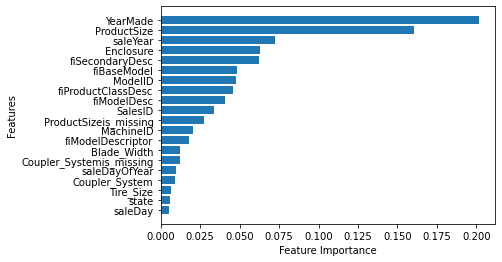

In [377]:
plot_features(X_train.columns, ideal_model.feature_importances_)

* Most Important Features is as expected Year Made and then Sale Year
* Followed By Product Size